# comparison to bayes from ds from scratch
This gives 101 true positives (spam classified as “spam”), 33 false positives (ham classified
as “spam”), 704 true negatives (ham classified as “ham”), and 38 false negatives
(spam classified as “ham”). This means our precision is 101 / (101 + 33) = 75%, and
our recall is 101 / (101 + 38) = 73%, which are not bad numbers for such a simple
model.

The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”

In [121]:
import theseus
import os
import hydraseq as hd

In [132]:
# ! mkdir data
# ! mv *.txt data/
! cd data/; ls | xargs wc -l

    3539 background.txt
    2747 easy_ham.txt
     283 hard_ham.txt
     509 spam.txt
    7078 total


In [128]:
def load_documents(path_file):
    documents = []
    with open(path_file, 'rb') as source:
        for line in source:
            try:
                documents.append(line.decode('utf-8').lower().strip().split()[1:])
            except:
                continue
    return documents

! ls data/
spam     = load_documents('data/spam.txt')
easy_ham = load_documents('data/easy_ham.txt')
hard_ham = load_documents('data/hard_ham.txt')
background = spam + easy_ham + hard_ham
print(len(spam), len(easy_ham), len(hard_ham), len(background))

background.txt easy_ham.txt   hard_ham.txt   spam.txt
498 2741 283 3522


In [133]:
n_background = theseus.Node(background)
n_spam       = theseus.Node(spam)
n_easy_ham   = theseus.Node(easy_ham)
n_hard_ham   = theseus.Node(hard_ham)

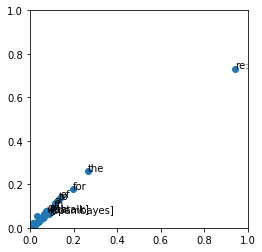

('money', (0.0036199095022624436, 0))
top spam:  ['adv:', 'rates', 'home', 'best', '[ilug-social]', 'systemworks', 'need', 'money', 'insurance', 'year']
top easy:  ['cvs', 'man', 'rh', 'viewing', "hanson's", 'sept', 'national', 'empire/g', 'sorting', 'o.t.']
top hard:  ['>', '[lockergnome', 'cnet', 'shopper)', '(cnet', 'tech', 'july', 'daily', 'reg', 'windows']
1	0	0	money
1	0	0	systemworks
1	0	0	rates
0	0	0	sale
1	0	0	year


In [188]:
theseus.node.visualize(n_easy_ham, n_background, axis_lims=(0.0, 1.0), magnification=10.0)

def create_filter(node_x, node_y, ratio=0.5):
    x, y, keys = theseus.node.create_xy_table(node_x, node_y, cutoff1=100, cutoff2=100, ratio=ratio)
    filter = []
    for row in zip(keys, zip(x, y)):
        if row[0] == 'money':
            print(row)
        filter.append(row[0])
    return filter

ratio = 0.1
f_spam = create_filter(n_spam, n_background, ratio=ratio)
f_easy = create_filter(n_easy_ham, n_background, ratio=ratio)
f_hard = create_filter(n_hard_ham, n_background, ratio=ratio)
# The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”
print("top spam: ", f_spam[:10])
print("top easy: ", f_easy[:10])
print("top hard: ", f_hard[:10])
for word in ['money', 'systemworks', 'rates', 'sale', 'year']:
    res = []
    for fil in [f_spam, f_easy, f_hard]:
        res.append("1" if word in fil else "0")
    res.append(word)
    print("\t".join(res))
        
    

In [186]:
def count_hits(group, fil, cutoff, depth):
    area = fil[:depth]
    total = len(group)
    hits = 0
    for sentence in group:
        if len([1 for w in sentence if w in area]) >= cutoff:
            hits += 1
    perc = float(hits)/total*100
    print(hits, "/", total, " percent: ", perc)
    return hits
        
cutoff =1
depth = 100
for target_filter, name in [(f_spam, "spam"), (f_hard, "hard"), (f_easy, "easy")]:
    print(name)
    sp = count_hits(spam,     target_filter, cutoff, depth)
    ha = count_hits(hard_ham, target_filter, cutoff, depth)
    ea = count_hits(easy_ham, target_filter, cutoff, depth)
    print()


spam
266 / 498  percent:  53.41365461847389
31 / 283  percent:  10.954063604240282
161 / 2741  percent:  5.8737686975556365

hard
55 / 498  percent:  11.04417670682731
199 / 283  percent:  70.31802120141343
158 / 2741  percent:  5.764319591390003

easy
2 / 498  percent:  0.4016064257028112
0 / 283  percent:  0.0
240 / 2741  percent:  8.755928493250638



In [14]:
hdr = hd.Hydraseq('')
for sentence in background:
    hdr.full_insert(" ".join(sentence))
len(hdr.columns)

50831

In [25]:
idx_elem = 10
sentence = " ".join(background[idx_elem])
print(sentence)
print('---------------------------------------------------')

def to_hydra_rep(sentence):
    patterns = []
    for convo in hdr.convolutions(sentence):
        #print(convo)
        elems = [cons for cons in convo[2] if cons.startswith('_')]
        for elem in elems:
            #print(elem, "\t",hdr.columns[elem][0].get_sequence_nodes())
            patterns.append(elem)
    return patterns
        
to_hydra_rep(sentence)

def group_to_hydra_rep(group):
    return [to_hydra_rep(sentence) for sentence in group]

h_background = group_to_hydra_rep(background)
h_spam = group_to_hydra_rep(spam)
h_easy_ham = group_to_hydra_rep(easy_ham)
h_hard_ham = group_to_hydra_rep(hard_ham)

^^^^^cell phone belt clips $1.95^^^^^^ 18070
---------------------------------------------------


In [26]:
n_h_background = theseus.Node(h_background)
n_h_spam = theseus.Node(h_spam)
n_h_easy_ham = theseus.Node(h_easy_ham)
n_h_hard_ham = theseus.Node(h_hard_ham)

In [47]:
limit = 10
ratio = 0.1
target = n_h_spam
count_hits(h_spam,     target, "spam",     limit, ratio)
count_hits(h_hard_ham, target, "hard_ham", limit, ratio)
count_hits(h_easy_ham, target, "easy_ham", limit, ratio)

16.666666666666664  percent predicted are  spam  has  83  hits out of  498
7.420494699646643  percent predicted are  hard_ham  has  21  hits out of  283
17.43889091572419  percent predicted are  easy_ham  has  478  hits out of  2741


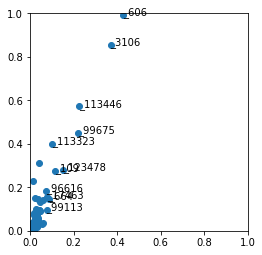

In [62]:
theseus.node.visualize(n_h_spam, n_h_background, axis_lims=(0.0, 1.0), magnification=20.0)

In [120]:

def get_spiral_dots(node1, node2, ratio):
    x, y, keys = theseus.node.create_xy_table(node1, node2, cutoff1=100, cutoff2=100, ratio=ratio)
    #print(len(x), len(y), len(keys))
    cles = []
    for row in zip(keys, zip(x, y)):
        if row[1][1] != 0:
            #print(row)
            cles.append(row[0])
        else:
            cles.append(row[0])
            #print("bad row ", row)
    return cles

ratio = 0.9
spam_list = get_spiral_dots(n_h_spam, n_h_background, ratio)
easy_list = get_spiral_dots(n_h_easy_ham, n_h_background, ratio)
hard_list = get_spiral_dots(n_h_hard_ham, n_h_background, ratio)

def new_count_hits(group, lst, thold):
    hits = 0
    for sentence in group:
        score = len(set(sentence) & set(lst))
        if score > thold:
            hits += 1
    return hits

print("background", len(h_background))
print("totals ", len(h_spam), len(h_easy_ham), len(h_hard_ham))
thold = 4
target = spam_list
spamers  = new_count_hits(h_spam,     target, thold)
easyhams = new_count_hits(h_easy_ham, target, thold)
hardhams = new_count_hits(h_hard_ham, target, thold)
print("hits   ",spamers, easyhams, hardhams)

background 3522
totals  498 2741 283
hits    151 42 26
